Dataset Shape: (125973, 43)
   duration  protocol_type  service  flag     src_bytes     dst_bytes  land  \
0       0.0              1       20     9  3.558064e-07  0.000000e+00   0.0   
1       0.0              2       44     9  1.057999e-07  0.000000e+00   0.0   
2       0.0              1       49     5  0.000000e+00  0.000000e+00   0.0   
3       0.0              1       24     9  1.681203e-07  6.223962e-06   0.0   
4       0.0              1       24     9  1.442067e-07  3.206260e-07   0.0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0             0.0     0.0  0.0  ...                    0.17   
1             0.0     0.0  0.0  ...                    0.00   
2             0.0     0.0  0.0  ...                    0.10   
3             0.0     0.0  0.0  ...                    1.00   
4             0.0     0.0  0.0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1 

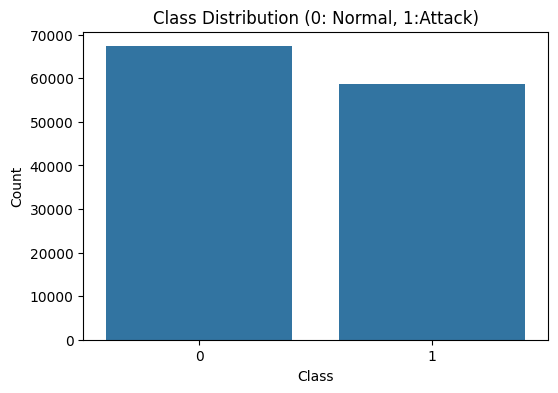

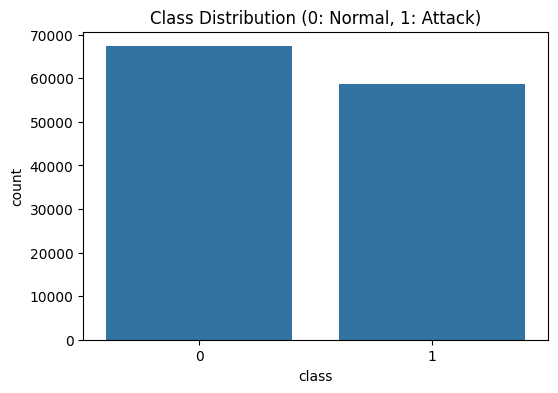

Top 5 Correlated Features:
 class                       1.000000
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
count                       0.576444
Name: class, dtype: float64

Decision Tree Results:
Accuracy: 0.9989283588013494
Precision: 0.9991500934897162
Recall: 0.9985560180073049
F1-Score: 0.9988529674157781


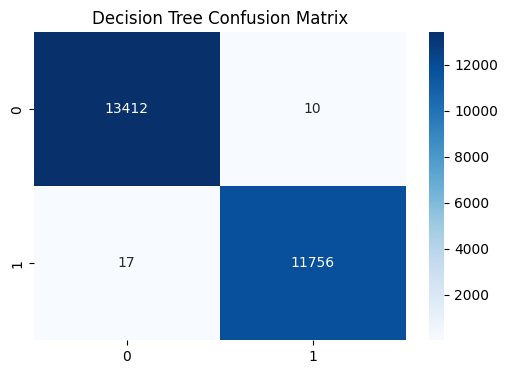


Random Forest Results:
Accuracy: 0.9994840246080572
Precision: 0.9995751911639762
Recall: 0.9993204790622611
F1-Score: 0.9994478188845941


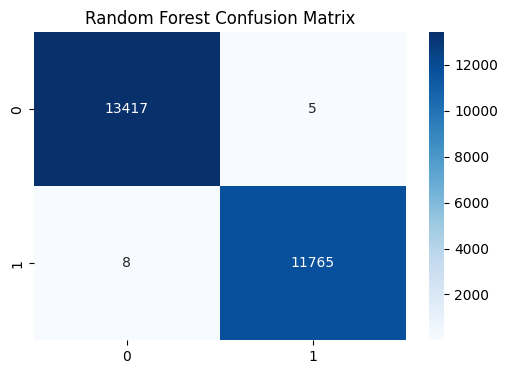


SVM Results:
Accuracy: 0.9809089104981147
Precision: 0.9687033040013282
Recall: 0.9911662278093943
F1-Score: 0.9798060371971955


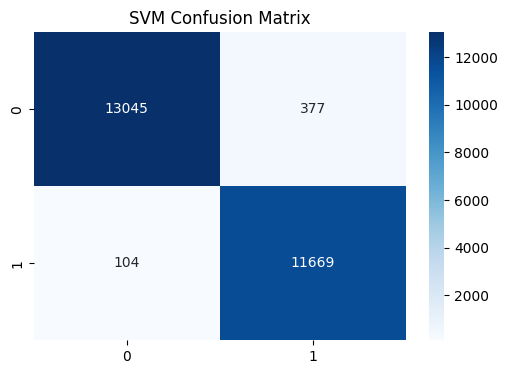


Random Forest (PCA) Results:
Accuracy: 0.9984520738241714
F1-Score: 0.9983435973667445


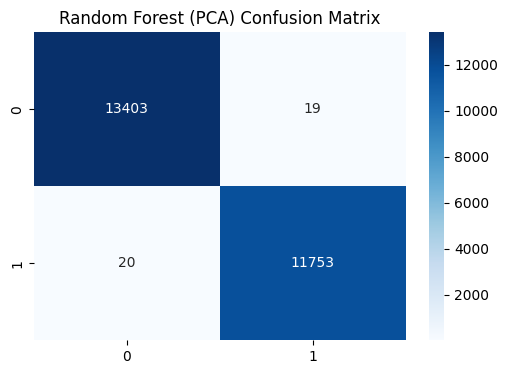


XGBoost Results:
Accuracy: 0.999285572534233
F1-Score: 0.99923527912312
XGBoost (PCA) F1-Score: 0.9980890908318825


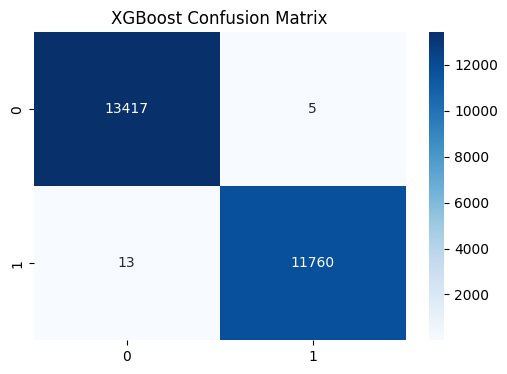

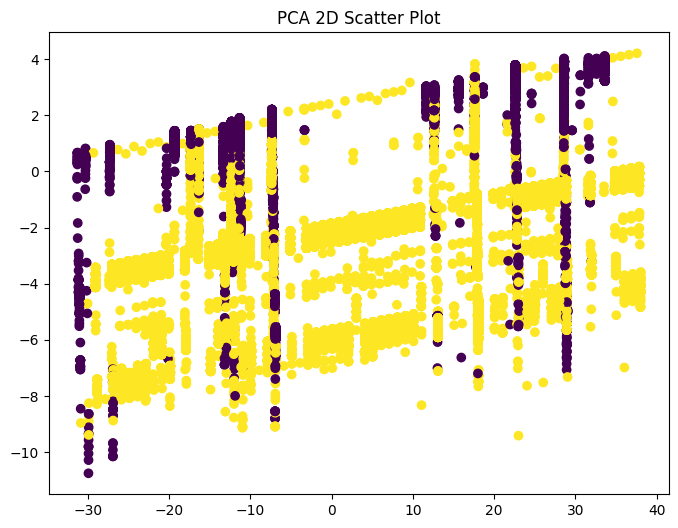

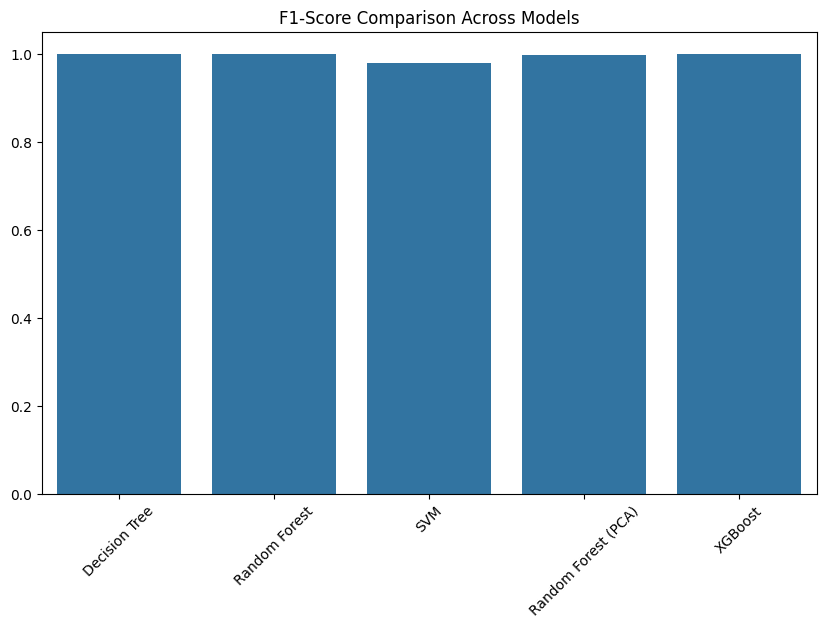


Final Comparison Table:
                  Model  Accuracy  F1-Score
0        Decision Tree  0.998928  0.998853
1        Random Forest  0.999484  0.999448
2                  SVM  0.980909  0.979806
3  Random Forest (PCA)  0.998452  0.998344
4              XGBoost  0.999286  0.999235


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Load the dataset
data = pd.read_csv('/content/KDDTrain+.csv', header=None)

# Define column names (41 features + 'class' + extra column = 43 total)
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'extra'
]

# Assign column names
data.columns = columns

# Convert attack types to binary labels (0: normal, 1: attack)
data['class'] = data['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Encode categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Normalize numerical columns (exclude 'extra' if it’s not numeric)
numerical_cols = data.columns.difference(categorical_cols + ['class', 'extra'])
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the result
print("Dataset Shape:", data.shape)
print(data.head())

#performing EDA
print("Dataset Shape:", data.shape)
print(data.head())

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Check class distribution
print("Class Distribution:\n", data['class'].value_counts())

#plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution (0: Normal, 1:Attack)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution (0: Normal, 1: Attack)')
plt.show()

# Top features by correlation
correlation = data.corr()['class'].sort_values(ascending=False)
print("Top 5 Correlated Features:\n", correlation.head(6))

# Step 3: Train-Test Split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Classification Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Dictionary to store F1-scores for later comparison
f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)
    f1_scores[name] = f1

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Step 4: Dimensionality Reduction with PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain Random Forest on PCA data (assuming it’s the best model)
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

print("\nRandom Forest (PCA) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
f1_pca = f1_score(y_test, y_pred_pca)
print("F1-Score:", f1_pca)
f1_scores['Random Forest (PCA)'] = f1_pca

# Confusion Matrix for PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest (PCA) Confusion Matrix')
plt.show()

# Step 5: Ensemble Learning with XGBoost
xgb = XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1-Score:", f1_xgb)
f1_scores['XGBoost'] = f1_xgb

# XGBoost on PCA data
xgb_pca = XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
xgb_pca.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)
print("XGBoost (PCA) F1-Score:", f1_score(y_test, y_pred_xgb_pca))
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

# PCA 2D Scatter Plot
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.title('PCA 2D Scatter Plot')
plt.show()

# Bar Plot of F1-Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.xticks(rotation=45)
plt.title('F1-Score Comparison Across Models')
plt.show()

# Final Comparison Table
results = pd.DataFrame({
    'Model': list(f1_scores.keys()),
    'Accuracy': [
        accuracy_score(y_test, models['Decision Tree'].predict(X_test)),
        accuracy_score(y_test, models['Random Forest'].predict(X_test)),
        accuracy_score(y_test, models['SVM'].predict(X_test)),
        accuracy_score(y_test, rf_pca.predict(X_test_pca)),
        accuracy_score(y_test, xgb.predict(X_test))
    ],
    'F1-Score': list(f1_scores.values())
})
print("\nFinal Comparison Table:\n", results)